# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [227]:
#Import all the tools we need

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to be appeared inside the notebook
%matplotlib inline

#Models from sickit-learn(sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data Frame

In [228]:
df=pd.read_csv('data/heart_disease.csv')

In [229]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


 # Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [230]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [231]:
df.T #transpose of a dataset

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [232]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [233]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [234]:
df.shape

(303, 14)

In [235]:
#Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

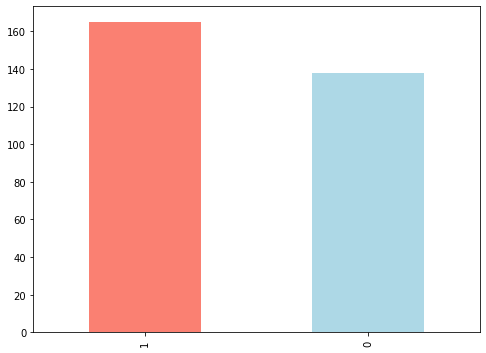

In [236]:
df["target"].value_counts().plot(figsize=(8,6), kind="bar", color=["salmon", "lightblue"])
plt.savefig('plots/target.png')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [238]:
# are there any missing valuse? let's check!!
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [239]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [240]:
#sns.pairplot(df)

## Heart Disease Frequency according to Sex

In [241]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [242]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

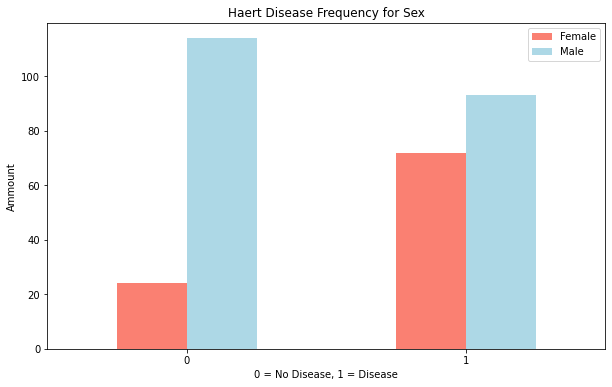

In [243]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(figsize=(10,6), kind="bar", color=["salmon", "lightblue"])
plt.title("Haert Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Ammount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)                     

## Age Vs Max Heart Rate for heart disease

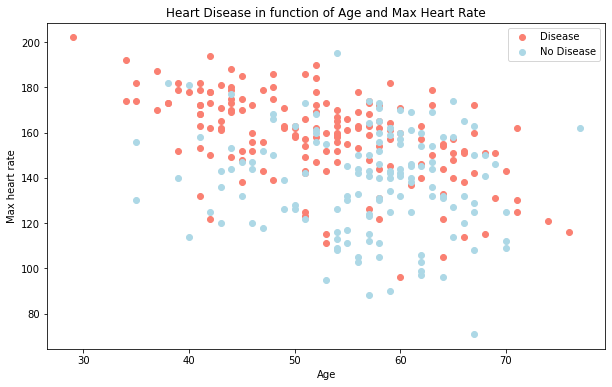

In [244]:
#create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],#thalach means max heart rate
            c="salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")
# Adding figure labels and titles
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"])

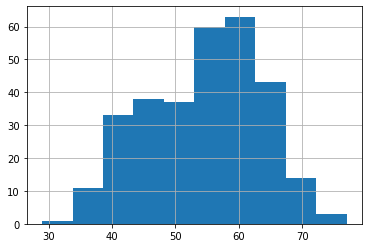

In [245]:
# Checking the distribution of the age column with a histogram
df["age"].hist()#here maximum portion is 60 means people of 60 ages are many.
#df.age.hist() #another way

In [246]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


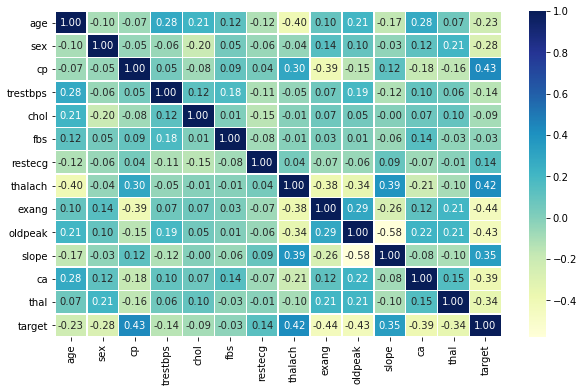

In [247]:
#Let's visualize the corr matrix
plt.figure(figsize=(10,6))
corr_mtx=df.corr()
sns.heatmap(corr_mtx,annot=True,linewidths=0.5,
             fmt=".2f",
             cmap="YlGnBu")

## Modelling

In [248]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [249]:
# Splitting data into X and Y
X=df.drop("target",axis=1)
Y=df["target"]

In [250]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [251]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [252]:
#splitting x and y into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                            test_size= 0.2)

In [253]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [254]:
X_test.shape

(61, 13)

In [255]:
X_train.shape

(242, 13)

In [256]:
Y_train.shape

(242,)

In [257]:
Y_test.shape

(61,)

In [258]:
# Put models in a dictionary 
models = {"Logisitc Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates give machine learning models.
    models: a dictionary of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42) #random.seed() here generates a random number within 42 so that the model doesn't later flactuate so much
    
    # Make a empty dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [259]:
model_scores = fit_and_score(models, X_train, X_test, Y_train,Y_test)
model_scores

C:\Users\Fariha Jahan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitc Regression': 0.8360655737704918,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8688524590163934}

In [260]:
df#drop() doesnt change the original dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Model Comparison

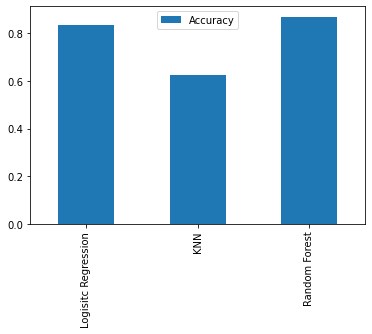

In [261]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps 
off. What should we do?

Let's look at the following:

* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

# Hyperparameter tuning (by hand/manually)

In [262]:
# Let's tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,Y_train))
    
    # Update thr test scores list
    test_scores.append(knn.score(X_test,Y_test))
    

In [263]:
train_scores

[1.0,
 0.78099173553719,
 0.7768595041322314,
 0.7851239669421488,
 0.7644628099173554,
 0.756198347107438,
 0.7396694214876033,
 0.7066115702479339,
 0.731404958677686,
 0.7066115702479339,
 0.7107438016528925,
 0.6983471074380165,
 0.7107438016528925,
 0.6942148760330579,
 0.71900826446281,
 0.7066115702479339,
 0.71900826446281,
 0.7107438016528925,
 0.71900826446281,
 0.71900826446281]

In [264]:
test_scores

[0.6229508196721312,
 0.5737704918032787,
 0.639344262295082,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312]

Maximum KNN score on the test data: 68.85%


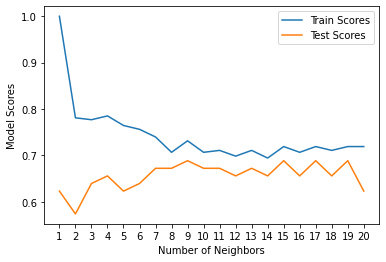

In [265]:
# Let's visualize,,,,,,,,(actually it shows the model loss; as lower the loss, accuracy is high)

plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label= "Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV(AutoTuining, first priority, then manual)

In [266]:
np.logspace(-4,4,20)#here 20 is a integer number which generates 20 number of samples;;(Number of samples to generate. Default is 50.)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [267]:
# Creating a hyperparameter grid for LogisticRegression

lr_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10, 1000, 50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)}

In [268]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=lr_grid,
                          cv=5,n_iter=20, verbose=True) #verbose is a flage helps writing regular expression

## Fit random hyperparameter search model for LogisticRegression
log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [269]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [270]:
log_reg.score(X_test,Y_test)

0.8360655737704918

In [271]:
# Setup random seed
np.random.seed(42)

# Setup random hyperperameter search for RandomForestClassifier 
rf_clf=RandomizedSearchCV(RandomForestClassifier(),param_distributions= rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search for RandomForestClassifier()
rf_clf.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [272]:
# Find the best hyperparameters
rf_clf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [273]:
rf_clf.score(X_test, Y_test)

0.8032786885245902

# Hyperparameter Tuning with GridSearchCV(AutoTuining, first priority, then manual)
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV.

In [274]:
# Different hyperparameters for our Logistic Regression model

Log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression()

gs_log_reg = GridSearchCV(LogisticRegression(),
                    param_grid= Log_reg_grid,
                    cv = 5,
                    verbose = True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [275]:
# Check for the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [276]:
gs_log_reg.score(X_test, Y_test)

0.819672131147541

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

It would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [277]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [278]:
y_preds#this is the prediction result

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [279]:
Y_test

24     1
167    0
9      1
27     1
250    0
      ..
118    1
268    0
48     1
282    0
29     1
Name: target, Length: 61, dtype: int64

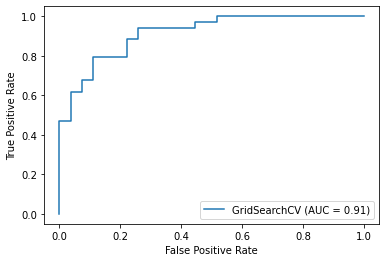

In [280]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,Y_test)

In [281]:
# Confussion Matrix
print(confusion_matrix(Y_test,y_preds))

[[20  7]
 [ 4 30]]


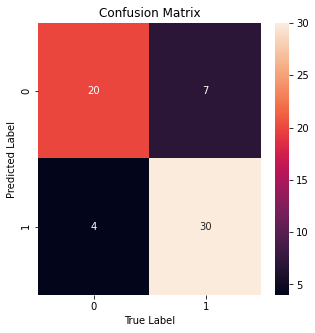

In [282]:
# Visualize confusion matrix
def plot_conf_mtx(Y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(Y_test,y_preds),
               annot=True,
               cbar=True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")
plot_conf_mtx(Y_test,y_preds)   
    

In [283]:
# Classificarion Report
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



## Calculate evaluation metrics using Cross-Validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [298]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [299]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C=0.38566204211634725, 
                          solver='liblinear')

In [300]:
# Cross-validation accuracy
cv_acc=cross_val_score(clf,
               X,
               Y,
               cv=5,
               scoring="accuracy")
print(f'Cross Validation Accuracy:{np.mean(cv_acc)*100:.2f}%')

Cross Validation Accuracy:83.81%


In [301]:
# Cross-validation precision
cv_pre=cross_val_score(clf,
               X,
               Y,
               cv=5,
               scoring="precision")
print(f'Cross Validation Precision:{np.mean(cv_pre)*100:.2f}%')

Cross Validation Precision:81.55%


In [302]:
# Cross-validation recall
cv_recall=cross_val_score(clf,
               X,
               Y,
               cv=5,
               scoring="recall")
print(f'Cross Validation Recall:{np.mean(cv_recall)*100:.2f}%')

Cross Validation Recall:91.52%


In [303]:
# Cross-validation f1-score
cv_f1=cross_val_score(clf,
               X,
               Y,
               cv=5,
               scoring="f1")
print(f'Cross Validation f1-score:{np.mean(cv_f1)*100:.2f}%')

Cross Validation f1-score:86.15%


In [304]:
# Visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_pre,
                        "Recall":cv_recall,
                        "F1-Score":cv_f1})
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.819672,0.775000,0.939394,0.849315
1,0.885246,0.882353,0.909091,0.895522
2,0.868852,0.857143,0.909091,0.882353
3,0.866667,0.837838,0.939394,0.885714
4,0.750000,0.725000,0.878788,0.794521


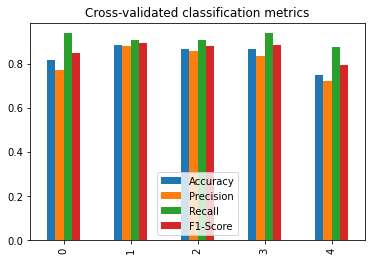

In [305]:
cv_metrics.plot(kind="bar",legend=True,title="Cross-validated classification metrics")

## ## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [306]:
# Fit the instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725, 
                          solver='liblinear')
clf.fit(X_train, Y_train);
clf.score(X_test,Y_test)

0.819672131147541

In [307]:
# Checking coefficients
clf.coef_

array([[ 0.00784022, -0.92724062,  0.67781668, -0.00833802, -0.00455799,
         0.09120507,  0.4666842 ,  0.02793163, -0.57770888, -0.59134982,
         0.4178101 , -0.61936804, -0.86120443]])

In [308]:
# Match coef's of features to columns
feature_dictionary=dict(zip(df.columns,list(clf.coef_[0])))
feature_dictionary

{'age': 0.007840217660864497,
 'sex': -0.9272406242134429,
 'cp': 0.6778166821174756,
 'trestbps': -0.00833802219899186,
 'chol': -0.004557989951841581,
 'fbs': 0.09120506838158939,
 'restecg': 0.4666841969822958,
 'thalach': 0.027931631621438996,
 'exang': -0.5777088849756803,
 'oldpeak': -0.5913498154786242,
 'slope': 0.4178101032997723,
 'ca': -0.619368041856081,
 'thal': -0.8612044334917305}

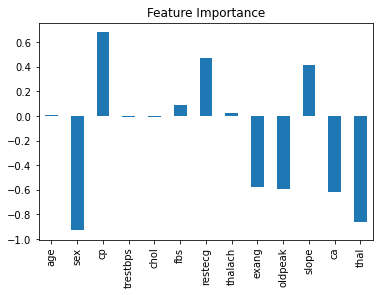

In [309]:
# Visualize the feature importance
feature_df=pd.DataFrame(feature_dictionary,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [310]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [311]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart